In [21]:
import db_utils as db
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Initialize webcam

def scan_park():
    cap = cv2.VideoCapture(0)
    while True:
        ret, frame = cap.read()
        cv2.imshow("Image Capture", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
            edged = cv2.Canny(bfilter, 30, 200)
            keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            contours = imutils.grab_contours(keypoints)
            contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
            location = None
            for contour in contours:
                approx = cv2.approxPolyDP(contour, 10, True)
                if len(approx) == 4:
                    location = approx
                    break
            mask = np.zeros(gray.shape, np.uint8)  
            new_image = cv2.drawContours(mask, [location], 0, 255, -1)
            new_image = cv2.bitwise_and(frame, frame, mask=mask)
            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2+1, y1:y2+1]
            # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            # plt.show()
            reader = easyocr.Reader(['en'])
            result = reader.readtext(cropped_image)
            data = ""
            for item in result:
                # data += item[1].replace(" ", "")
                data += item[1]
            data = data.replace("'", "")
            print(data)
            db.park_car(data)
            break
        


    # Release resources
    cap.release()
    cv2.destroyAllWindows()

def scan_unpark():
    # Initialize webcam
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()
        cv2.imshow("Image Capture", frame)
        key = cv2.waitKey(1) & 0xFF
        if key == ord('c'):
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
            edged = cv2.Canny(bfilter, 30, 200)
            keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            contours = imutils.grab_contours(keypoints)
            contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
            location = None
            for contour in contours:
                approx = cv2.approxPolyDP(contour, 10, True)
                if len(approx) == 4:
                    location = approx
                    break
            mask = np.zeros(gray.shape, np.uint8)  
            new_image = cv2.drawContours(mask, [location], 0, 255, -1)
            new_image = cv2.bitwise_and(frame, frame, mask=mask)
            (x, y) = np.where(mask == 255)
            (x1, y1) = (np.min(x), np.min(y))
            (x2, y2) = (np.max(x), np.max(y))
            cropped_image = gray[x1:x2+1, y1:y2+1]
            # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
            # plt.show()
            reader = easyocr.Reader(['en'])
            result = reader.readtext(cropped_image)
            data = ""
            for item in result:
                # data += item[1].replace(" ", "")
                data += item[1]
            data = data.replace("'", "")
            print(data)
            db.unpark_car(data)
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()

def image_park(image_path):
    frame = cv2.imread(image_path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)  
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(frame, frame, mask=mask)
    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    # plt.show()
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    data = ""
    for item in result:
        # data += item[1].replace(" ", "")
        data += item[1]
    data = data.replace("'", "")
    print(data)
    db.park_car(data)

def image_unpark(image_path):
    frame = cv2.imread(image_path)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    edged = cv2.Canny(bfilter, 30, 200)
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)  
    new_image = cv2.drawContours(mask, [location], 0, 255, -1)
    new_image = cv2.bitwise_and(frame, frame, mask=mask)
    (x, y) = np.where(mask == 255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]
    # plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    # plt.show()
    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)
    data = ""
    for item in result:
        # data += item[1].replace(" ", "")
        data += item[1]
    data = data.replace("'", "")
    print(data)
    db.unpark_car(data)


## ENTRY

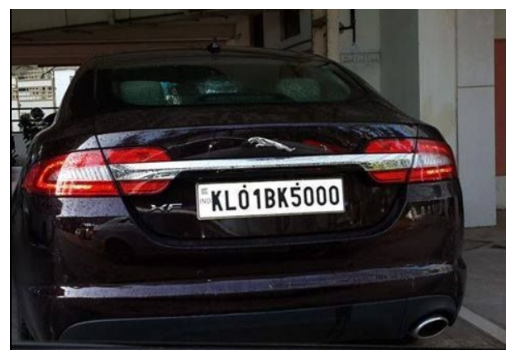

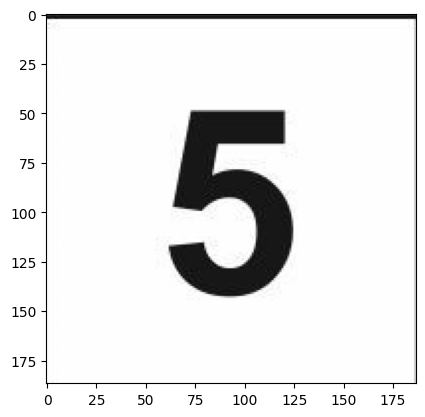

In [48]:
i = 6

# open the image and display it f"test/car-{i}.jpg" using python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_path.jpg' with the path to your image file
img = mpimg.imread(f"test/car-{i}.jpg")
plt.imshow(img)
plt.axis('off')  # Remove axis
plt.show()

number = mpimg.imread(f"numbers/{db.get_empty_slot()}.jpg")
plt.imshow(number)
plt.show()


# image_park(f"test/car-{i}.jpg")
# db.view_parking()

## EXIT

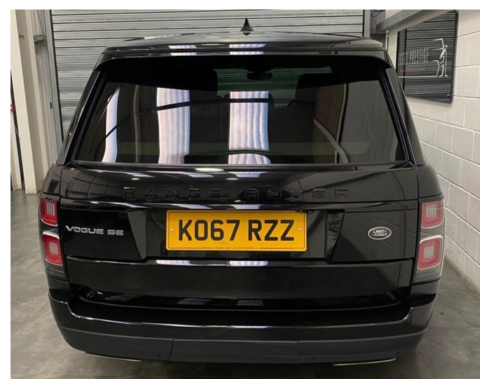

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


K067 RZZ
K067 RZZ is not parked
pid car
1 empty
2 empty
3 empty
4 empty
5 empty


In [50]:
i = 2

# open the image and display it f"test/car-{i}.jpg" using python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace 'image_path.jpg' with the path to your image file
img = mpimg.imread(f"test/car-{i}.jpg")
plt.imshow(img)
plt.axis('off')  # Remove axis
plt.show()



image_unpark(f"test/car-{i}.jpg")
db.view_parking()